<a href="https://colab.research.google.com/github/DurgaArun88/FinancialDataAnalysis/blob/main/FinancialDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Data Cleaning
# load libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/content/sample_data/stocks.csv")

In [5]:
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2/7/2023,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2/8/2023,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2/9/2023,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2/10/2023,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2/13/2023,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df = df.sort_values('Date')
df.set_index('Date', inplace = True)

In [9]:
df.isnull().sum()

,0
Ticker,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [10]:
df['Volume'] = df['Volume'].astype(float)

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2023-02-07 to 2023-05-05
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Open       248 non-null    float64
 2   High       248 non-null    float64
 3   Low        248 non-null    float64
 4   Close      248 non-null    float64
 5   Adj Close  248 non-null    float64
 6   Volume     248 non-null    float64
dtypes: float64(6), object(1)
memory usage: 15.5+ KB


In [13]:
# Explorary Data Analysis

df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177506,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


In [14]:
df = df.drop_duplicates()

In [15]:
aapl_df = df[df['Ticker']=='AAPL']

In [16]:
print(df[['Ticker', 'Close']].head(10))

           Ticker       Close
Date                         
2023-02-07   AAPL  154.649994
2023-02-07   MSFT  267.559998
2023-02-07   GOOG  108.040001
2023-02-07   NFLX  362.950012
2023-02-08   GOOG  100.000000
2023-02-08   MSFT  266.730011
2023-02-08   AAPL  151.919998
2023-02-08   NFLX  366.829987
2023-02-09   MSFT  263.619995
2023-02-09   GOOG   95.459999


In [17]:
plt.savefig("AAPL_Daily Closing Price.png")

<Figure size 640x480 with 0 Axes>

In [18]:
df.reset_index(inplace=True)  # Bring 'Date' back into columns
df['Date'] = pd.to_datetime(df['Date'])

aapl_df = df[df['Ticker'] == 'AAPL']
aapl_df = aapl_df.sort_values(by='Date')
aapl_df.set_index('Date', inplace=True)

In [19]:
# Daily Return

aapl_df['Daily Return (%)'] = aapl_df['Close'].pct_change() * 100

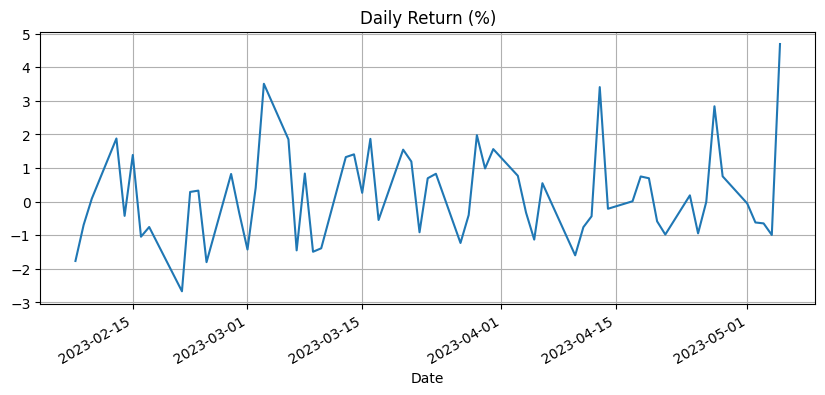

In [20]:
plt.figure(figsize=(10, 4))
aapl_df['Daily Return (%)'].plot(title='Daily Return (%)')
plt.grid(True)
plt.show()

In [21]:
plt.savefig("Daily Return (%).png")

<Figure size 640x480 with 0 Axes>

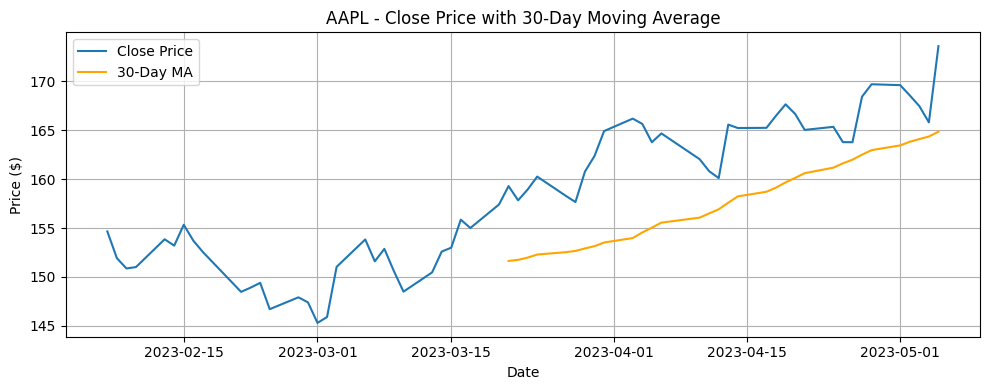

In [22]:
#30-Day Moving Average
aapl_df['MA30'] = aapl_df['Close'].rolling(window=30).mean()

plt.figure(figsize=(10, 4))
plt.plot(aapl_df['Close'], label='Close Price')
plt.plot(aapl_df['MA30'], label='30-Day MA', color='orange')
plt.title('AAPL - Close Price with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
plt.savefig("30-Day Moving Average.png")

<Figure size 640x480 with 0 Axes>

In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [26]:
ts = aapl_df['Close']

In [27]:
# Fit Holt-Winters model

model = ExponentialSmoothing(ts, trend='add', seasonal=None)
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [28]:
forecast = model_fit.forecast(30) # forecast next 30 days

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


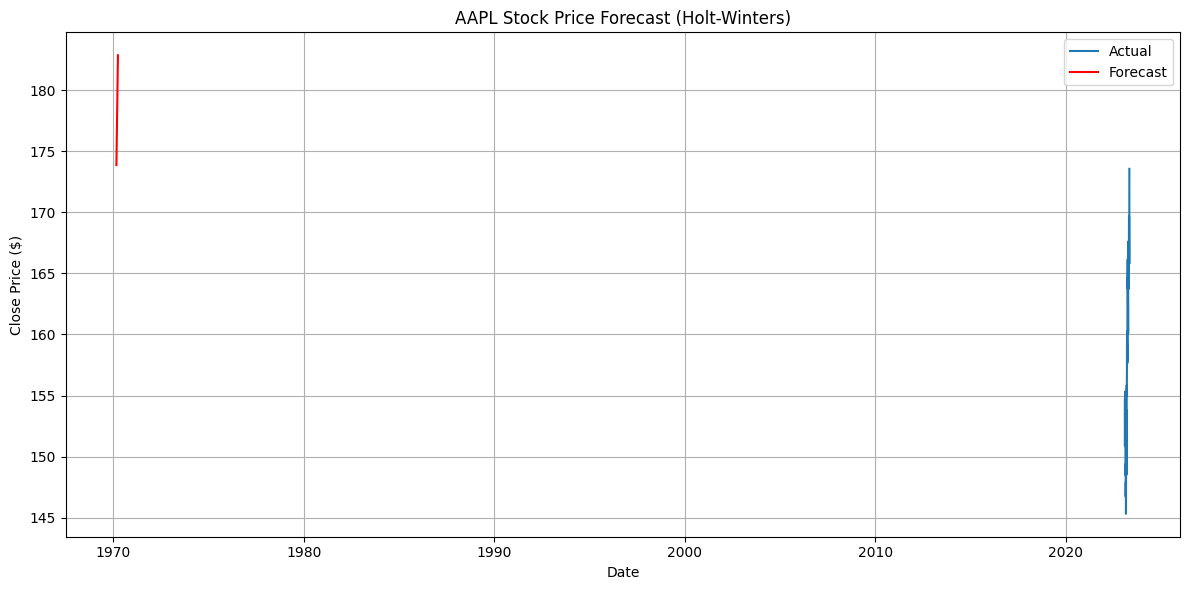

In [29]:
# visualize the forecast

plt.figure(figsize=(12,6))
plt.plot(ts, label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.title('AAPL Stock Price Forecast (Holt-Winters)')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
forecast_df = forecast.reset_index()
forecast_df.columns = ['Date', 'Forecasted Close']
forecast_df.to_csv('aapl_forecast.csv', index=False)